 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [62]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [63]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv,index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns_df.dropna()
whale_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [64]:
# Count nulls
whale_returns_df.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [65]:
# Drop nulls
whale_returns_df = whale_returns_df .dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [66]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv,index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns_df.dropna()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [67]:
# Count nulls
algo_returns_df.isnull().mean()*100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [68]:
# Drop nulls
algo_returns_df = algo_returns_df .dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [69]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [70]:
# Check Data Types
sp500_history_df.dtypes


Close    object
dtype: object

In [71]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close']
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtype


dtype('float64')

In [72]:
sp500_history_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [73]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [74]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.isnull().sum()


Close    0
dtype: int64

In [75]:
# Rename Column
# Check Column Name 
sp500_daily_returns.columns


Index(['Close'], dtype='object')

In [76]:
# Set column Name 
column=["S&P 500"]
sp500_daily_returns.columns=column
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [77]:
# Concatenate all DataFrames into a single DataFrame
concatenate_df = pd.concat([whale_returns_df,algo_returns_df,sp500_daily_returns], axis="columns", join="inner")
concatenate_df.sort_index(inplace=True)
concatenate_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

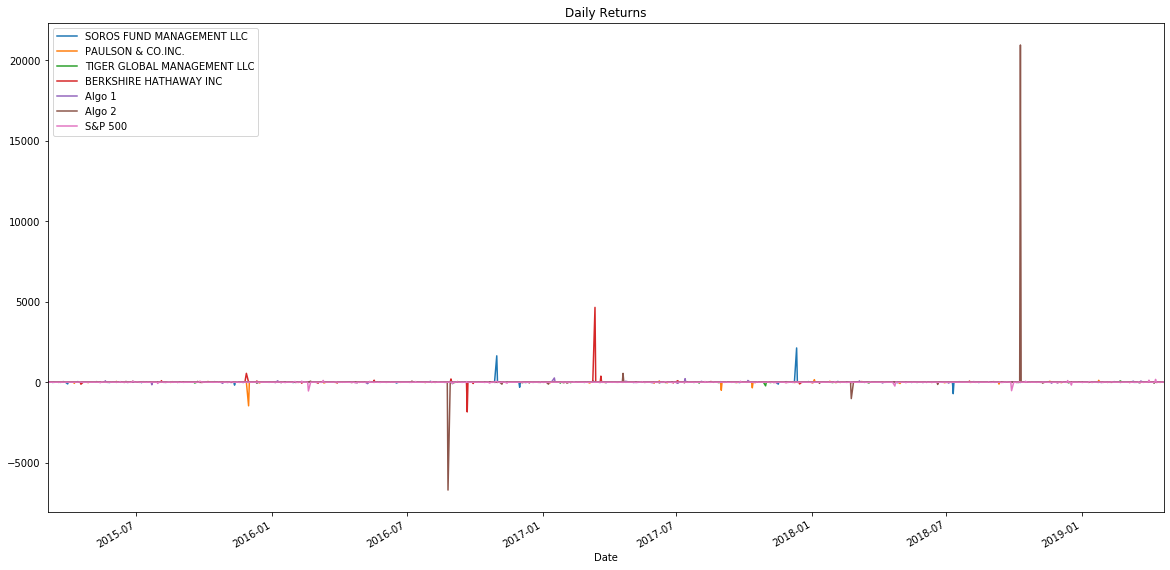

In [78]:
# caclculate daily returns
##Whale_returns_dr = whale_returns_df.pct_change().dropna()
###algo_returns_dr = algo_returns_df.pct_change().dropna()
##sp500_history_dr = sp500_history_df.pct_change().dropna()
# Combine Returns 
#daily_returns = pd.concat([Whale_returns_dr,algo_returns_dr,sp500_history_dr], axis='columns', join='inner')
daily_returns = concatenate_df.pct_change()


# plot daily returns 
daily_returns.plot(figsize=(20,10), title = "Daily Returns")

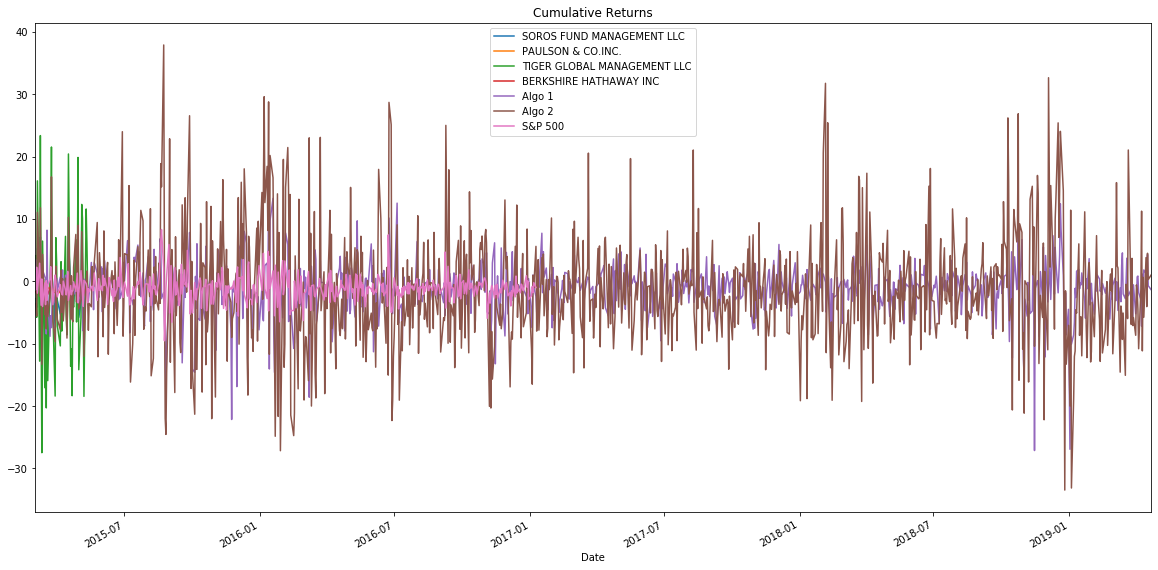

In [79]:
# Calculate culuative returns 
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title = "Cumulative Returns")

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

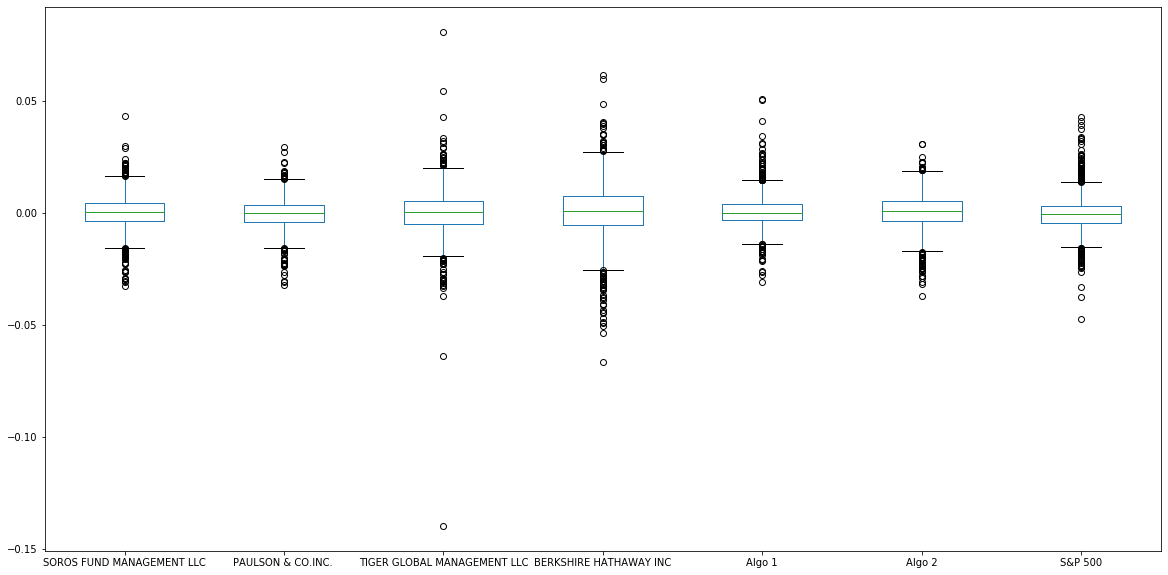

In [80]:
# Box plot to visually show risk
concatenate_df.plot.box(figsize=(20,10))


In [83]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
daily_std = concatenate_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [84]:
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
dtype: float64

In [85]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

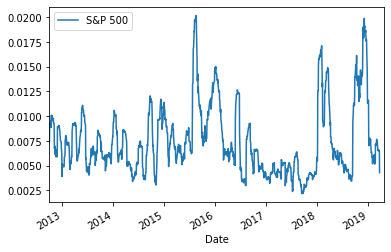

In [86]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_daily_returns.rolling(window=21).std().plot()

In [98]:
# Correlation
correlation = concatenate_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [103]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

berkshire_covariance = concatenate_df['BERKSHIRE HATHAWAY INC'].cov(concatenate_df['S&P 500'])
berkshire_covariance

variance = concatenate_df['S&P 500'].var()
berkshire_beta = berkshire_covariance / variance
berkshire_beta


-0.020846489408902668

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [ ]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [ ]:
# Annualzied Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios


 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [121]:
# Read the first stock
goog_historical_csv = Path("../Resources/goog_historical.csv")
goog_historical_df = pd.read_csv(goog_historical_csv,infer_datetime_format=True, parse_dates=True)
goog_historical_df.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [122]:
# Read the second stock
aapl_historical_csv = Path("../Resources/aapl_historical.csv")
appl_historical_df = pd.read_csv(aapl_historical_csv,infer_datetime_format=True, parse_dates=True)
appl_historical_df.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [123]:
# Read the third stock
cost_historical_csv = Path("../Resources/cost_historical.csv")
cost_historical_df = pd.read_csv(cost_historical_csv,infer_datetime_format=True, parse_dates=True)
cost_historical_df.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [130]:
# Concatenate all stocks into a single DataFrame
concat_df = pd.concat([goog_historical_df,appl_historical_df,cost_historical_df], axis="rows", join="inner")
concat_df.sort_index(inplace=True)
concat_df.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
0,AAPL,5/9/2019,200.72
0,COST,5/9/2019,243.47
1,GOOG,5/8/2019,1166.27
1,AAPL,5/8/2019,202.90


In [ ]:
# Reset the index
# YOUR CODE HERE

In [ ]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE

In [ ]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# YOUR CODE HERE

In [ ]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [ ]:
# Risk
# YOUR CODE HERE

In [ ]:
# Rolling
# YOUR CODE HERE

In [ ]:
# Beta
# YOUR CODE HERE

In [ ]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [ ]:
# YOUR CODE HERE